In [1]:
#2

In [110]:
#Importing necessary libraraies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [3]:
#LOADING DATASET

In [65]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")

EDA

In [5]:
df.shape

(1338, 7)

In [6]:
#We see there are 1338 rows and seven columns

In [7]:
#CHECKING SAMPLE

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# We understand that col 1 to 6 is independent features and charges are our label.Charges are in continous data . This is a regression based analysis

#Getting info about our dataset like dtypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# We see no null values and data is having correct data types

In [14]:
#to further prove null values being none

In [16]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [17]:
#DATA ANALYSIS AND VISUALISATION

In [18]:
#OVERALL STATS OF DATASET

In [66]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
#we see that for numerical cols like age,bmi,etc the mean is 39 and 30 respectively. minimum age is 18 and b,mi is 15.96 .
#25% of population in data set are below 25 yrs and have a bmi around 26

In [23]:
#for non numerical data like smoker,sex and region we will use encoding mehod for making it into boolean values
#this will help machine to learn in its language

In [67]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [25]:
#we understand that there are binary values for this column. so we will map them to 0 for female and 1 for male

In [68]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [69]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [31]:
#Similarly for smoker the data is categorical and yes:1 and no :0

In [70]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [71]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [34]:
#now for  region we have 4 areas as per q n dataset
# southwest:1,southeast:2,northwest:3,northeast:4

In [72]:
df['region']=df['region'].map({ 'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [73]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,3,10600.5483
1334,18,0,31.92,0,0,4,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,1,2007.9450
1337,61,0,29.07,0,1,3,29141.3603


In [37]:
#now all data is in numerical datatype

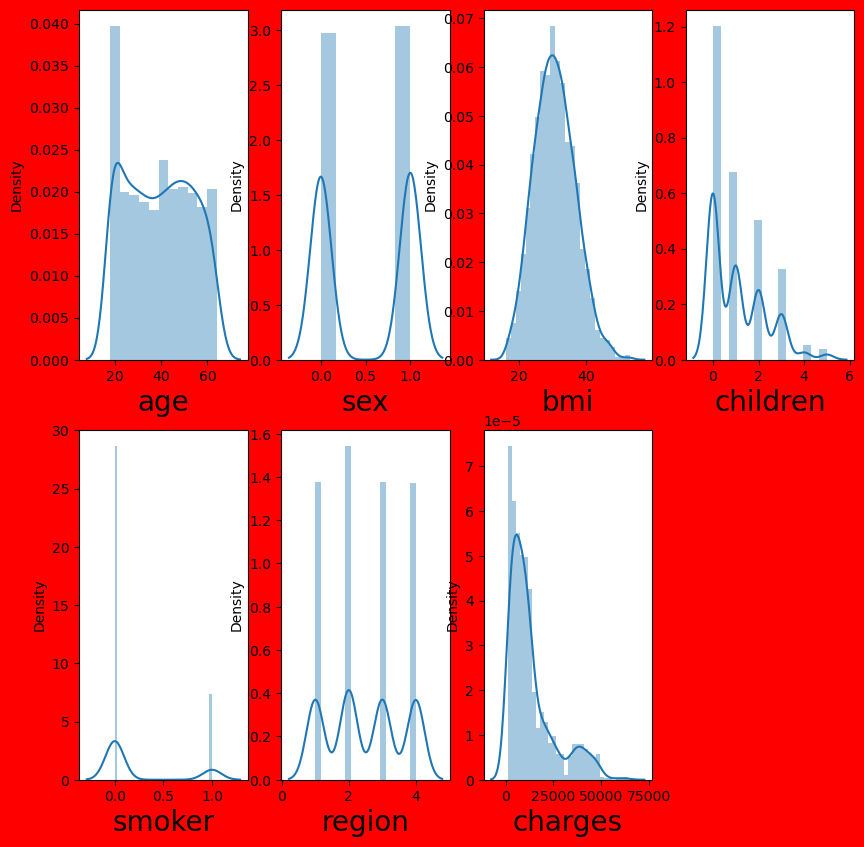

In [74]:
plot=plt.figure(figsize=(10,10), facecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
        
plt.show()        

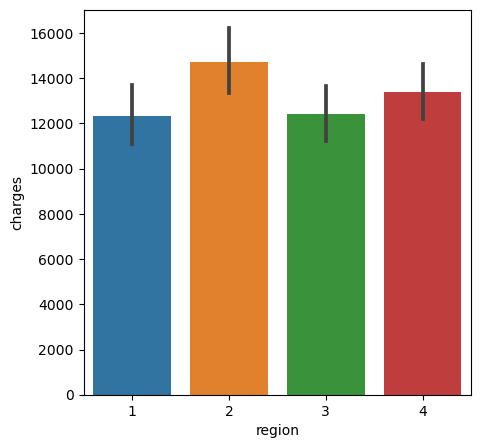

In [75]:
plot=plt.figure(figsize=(5,5))# to create graph
sns.barplot(x='region',y='charges',data=df)
plt.show()

In [47]:
#We understand med chages are more for southeast ppl

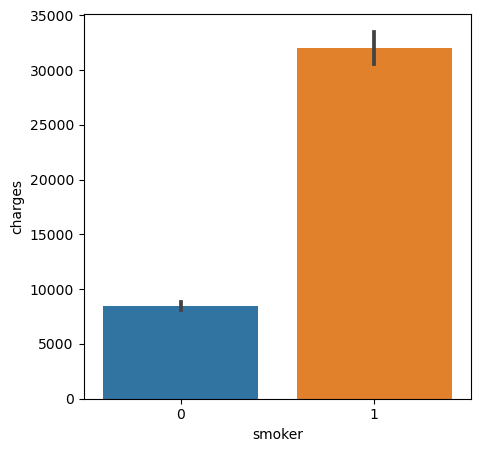

In [76]:
plot=plt.figure(figsize=(5,5))# to create graph
sns.barplot(x='smoker',y='charges',data=df)
plt.show()

In [49]:
#smokers have more charges

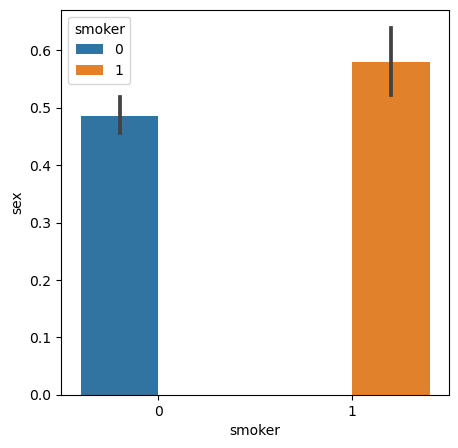

In [52]:
plot=plt.figure(figsize=(5,5))# to create graph
sns.barplot(x='smoker',y='sex',hue='smoker',data=df)
plt.show()

In [53]:
#Male smoker has more charges

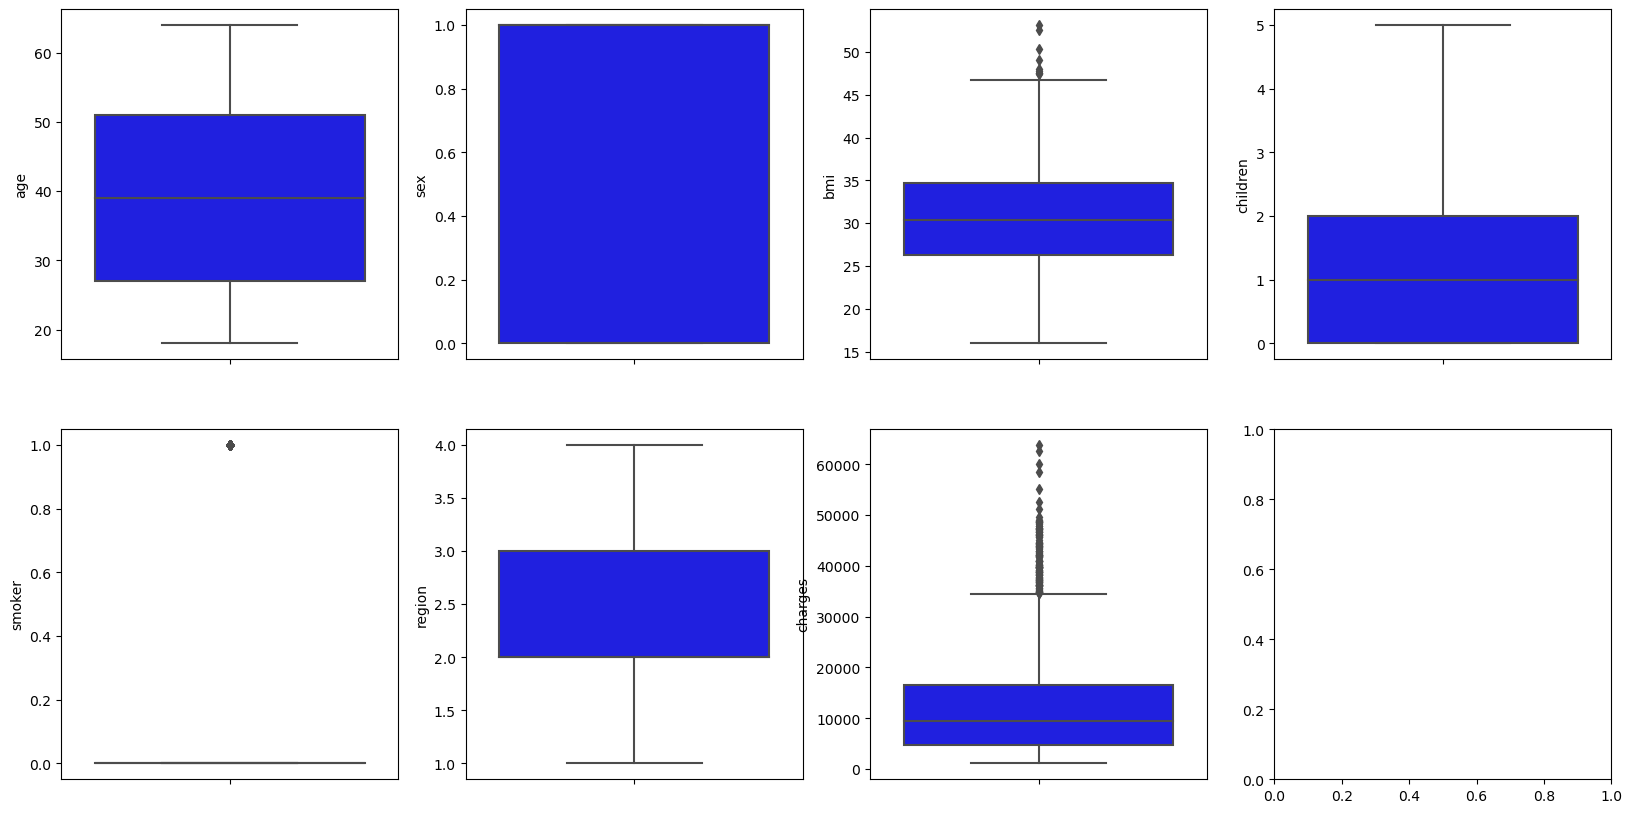

In [55]:
#lets see whether our data has outliers or not:

# create box plots
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='b', ax=ax[index])
    index += 1
plt.show()

In [56]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df=mod_outlier(df)

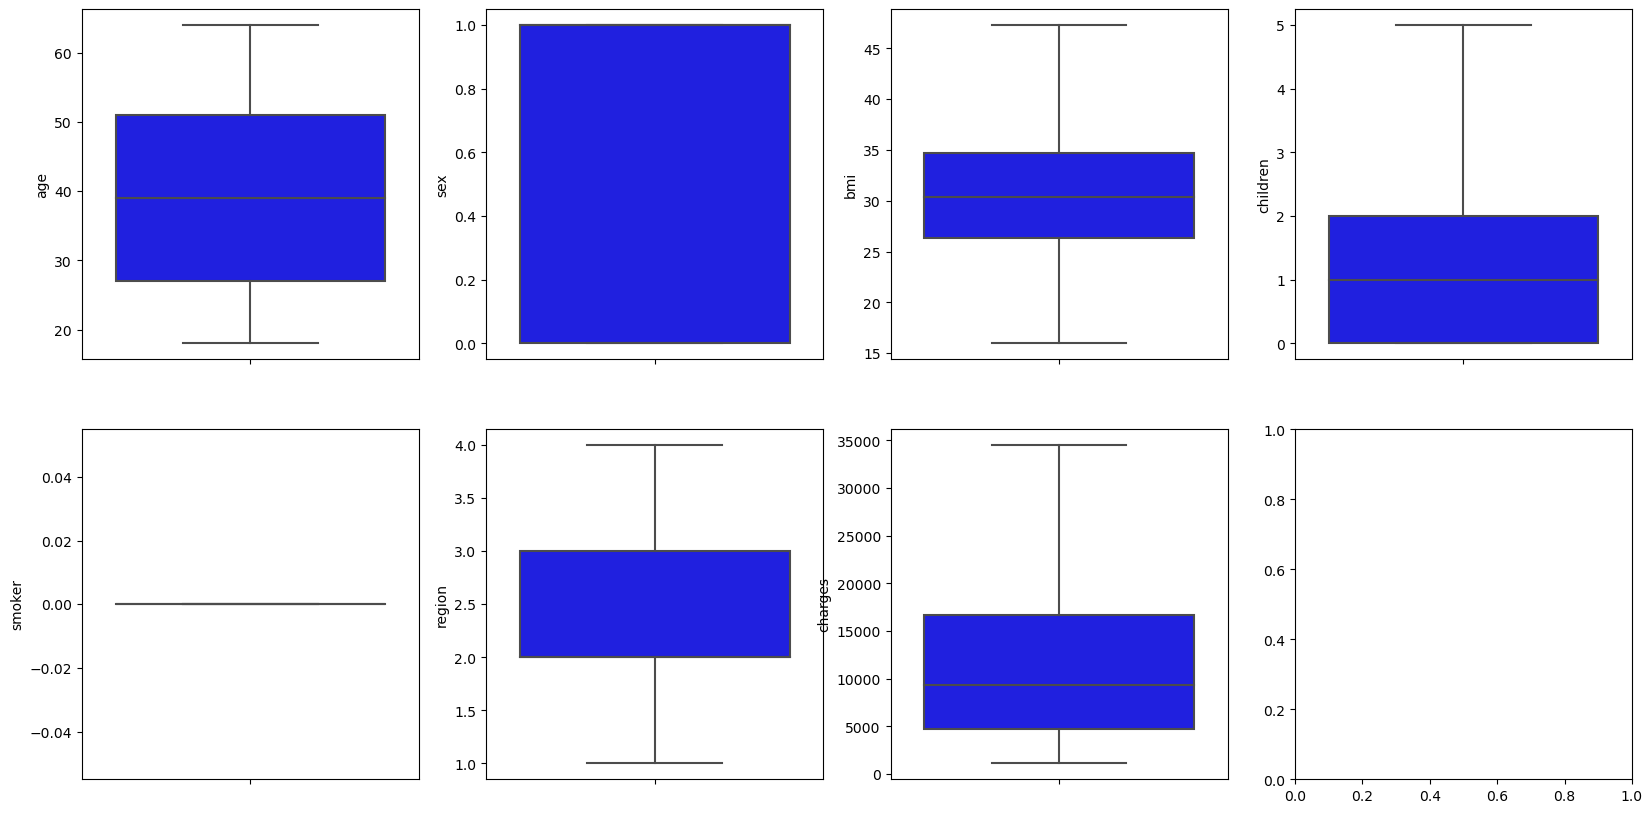

In [57]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='b', ax=ax[index])
    index += 1
plt.show()

FINDING CORRELATION OF ALL FEATURES

In [77]:
corr=df.corr()

MAKING A HEATMAP FOR UNDERSTANDING THE SAME

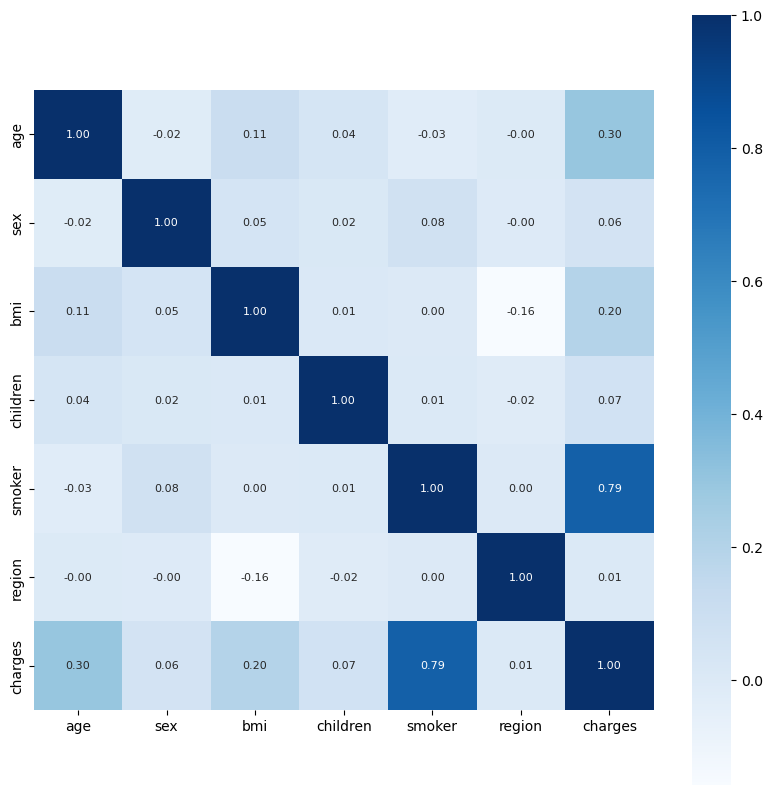

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt=".2f",annot=True,annot_kws={"size":8},cmap="Blues")
plt.show()

In [79]:
#Smoker has high correlation with charges


In [81]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [82]:
#DATA SPLITTING

In [83]:
X=df.drop(columns=['charges'],axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [84]:
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [87]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [130]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,-0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,-1.343905


MODEL TRAINING

In [131]:
lr=LinearRegression()
lr.fit(X_train,y_train)
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)


GradientBoostingRegressor()

In [93]:
#TEST PREDICTION

In [132]:
lr_model=lr.predict(X_test)
svm_model=svm.predict(X_test)
rf_model=rf.predict(X_test)
gbr_model=gbr.predict(X_test)

In [133]:
new_df=pd.DataFrame({'Actual':y_test,'Linear Regression':lr_model,'SVM':svm_model,'Random Forest':rf_model,'Gradient':gbr_model})
new_df

,Actual,Linear Regression,SVM,Random Forest,Gradient
764,9095.06825,8931.421164,9505.525492,9307.511818,10613.512496
887,5272.17580,7070.906703,9455.571398,5668.730891,5680.434246
890,29330.98315,36937.080496,9595.485762,28240.052175,29627.694391
1293,9301.89355,9596.992144,9511.612207,12012.756465,9541.852526
259,33750.29180,27008.354871,9390.784048,34401.911544,34327.943251
...,...,...,...,...,...
701,9541.69555,16133.551618,9539.359957,13985.554035,12040.700676
672,4399.73100,6743.836928,9455.381609,5681.643395,5956.563043
1163,2200.83085,2066.203492,9387.893181,6752.639470,3280.552401
1103,11363.28320,14697.798124,9577.973612,11557.698660,12418.775886


In [96]:
#we can see rf and gbr is giving some sort of closeness with actual. we can see this through visually to make an informed decision

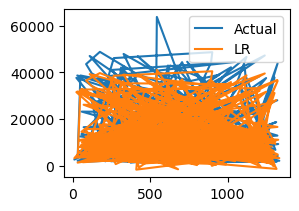

In [134]:
plt.subplot(221)#2X2 grid format
plt.plot(new_df['Actual'],label='Actual')
plt.plot(new_df['Linear Regression'],label='LR')
plt.legend()


In [101]:
#since the above graph is difficult to understand we will use iloc() to get the first 20 rows comparison

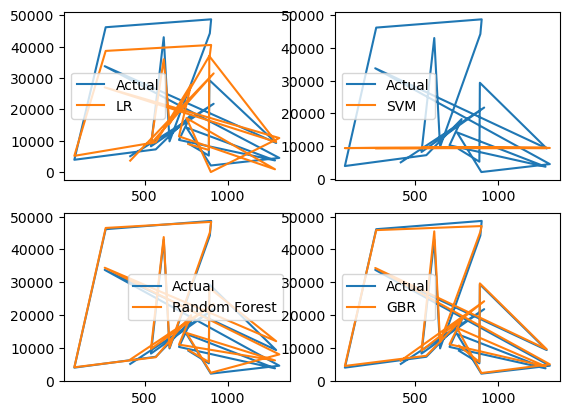

In [135]:
plt.subplot(221)#2X2 grid format
plt.plot(new_df['Actual'].iloc[0:21],label='Actual')
plt.plot(new_df['Linear Regression'].iloc[0:21],label='LR')
plt.legend()
plt.subplot(222)#2X2 grid format
plt.plot(new_df['Actual'].iloc[0:21],label='Actual')
plt.plot(new_df['SVM'].iloc[0:21],label='SVM')
plt.legend()
plt.subplot(223)#2X2 grid format
plt.plot(new_df['Actual'].iloc[0:21],label='Actual')
plt.plot(new_df['Random Forest'].iloc[0:21],label='Random Forest')
plt.legend()
plt.subplot(224)#2X2 grid format
plt.plot(new_df['Actual'].iloc[0:21],label='Actual')
plt.plot(new_df['Gradient'].iloc[0:21],label='GBR')
plt.legend()


In [107]:
#We can see the first plot shows a large gap between actual and prediction
#Plot 2 shows constant line
#Plot 3 and 4 are more or less in sync with each other

In [108]:
#MODEL EVALUATION

In [136]:
score_lr_model=r2_score(y_test,lr_model)
score_svm_model=r2_score(y_test,svm_model)
score_rf_model=r2_score(y_test,rf_model)
score_gbr_model=r2_score(y_test,gbr_model)


In [137]:
print(score_lr_model,score_svm_model,score_rf_model,score_gbr_model)


0.7694415927057694 -0.08170471274983182 0.8509566244494626 0.869087343773058


In [115]:
#So we understand that gbr is working best. But we will also use MSE,RMSE too

In [139]:
mae_lr_model=mean_absolute_error(y_test,lr_model)
mae_svm_model=mean_absolute_error(y_test,svm_model)
mae_rf_model=mean_absolute_error(y_test,rf_model)
mae_gbr_model=mean_absolute_error(y_test,gbr_model)



In [140]:
print(mae_lr_model,mae_svm_model,mae_rf_model,mae_gbr_model)

4155.239843059379 8229.804004726911 2544.6643590726367 2436.2159138124425


In [118]:
# As the GBR model has the least MAE it is performing the best

In [141]:
mse_lr_model=mean_squared_error(y_test,lr_model)
mse_svm_model=mean_squared_error(y_test,svm_model)
mse_rf_model=mean_squared_error(y_test,rf_model)
mse_gbr_model=mean_squared_error(y_test,gbr_model)
print(mse_lr_model,mse_svm_model,mse_rf_model,mse_gbr_model)


33805466.89868861 158604204.85275856 21853381.78630186 19194977.61385703


In [143]:
rmse_lr_model=np.sqrt(mean_squared_error(y_test,lr_model))
rmse_svm_model=np.sqrt(mean_squared_error(y_test,svm_model))
rmse_rf_model=np.sqrt(mean_squared_error(y_test,rf_model))
rmse_gbr_model=np.sqrt(mean_squared_error(y_test,gbr_model))
print(rmse_lr_model,rmse_svm_model,rmse_rf_model,rmse_gbr_model)

5814.246890069995 12593.816135419738 4674.760077940028 4381.207323770131


In [144]:
#Checking a random figure

In [145]:
data={'age':18,'sex':0,'bmi':36.85,'children':0,'smoker':0,'region':2}
index=[0]
df1=pd.DataFrame(data,index)
df1


,age,sex,bmi,children,smoker,region
0,18,0,36.85,0,0,2


In [151]:
pred_random=rf.predict(df1)
pred_random

array([1673.5895305])

In [152]:
#the customer needs to pay 1673.59

#if we change the smoker value to 1 the insurance value will be?

In [153]:
data={'age':18,'sex':0,'bmi':36.85,'children':0,'smoker':1,'region':2}
index=[0]
df1=pd.DataFrame(data,index)
df1

,age,sex,bmi,children,smoker,region
0,18,0,36.85,0,1,2


In [154]:
pred_random=rf.predict(df1)
pred_random

array([36402.9363334])

In [155]:
#Thus the customer needs to pay 36402 now.


In [ ]:
#THANK YOU